# Sales Data Analysis
The following is an Exploratory Data Analysis (EDA) project. 

In this project we will be analysing 12 months worth of sales data using Pandas and MatPlotlib modules of Python. We will derive infrences and answer real-world business questions using this data.

The dataset contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc. 

Link to the dataset: https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/8b511cdf8aeea304bb64710784db29548414b736/SalesAnalysis/Sales_Data

<img src="https://d1mnxluw9mpf9w.cloudfront.net/media/6695/a.jpg">

## Importing Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
from itertools import combinations
from collections import Counter

## Importing CSV files

In [2]:

df_jan = pd.read_csv("./Sales_Data/Sales_January_2019.csv")
df_feb = pd.read_csv("./Sales_Data/Sales_February_2019.csv")
df_mar = pd.read_csv("./Sales_Data/Sales_March_2019.csv")
df_apr = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df_may = pd.read_csv("./Sales_Data/Sales_May_2019.csv")
df_jun = pd.read_csv("./Sales_Data/Sales_June_2019.csv")
df_jul = pd.read_csv("./Sales_Data/Sales_July_2019.csv")
df_aug = pd.read_csv("./Sales_Data/Sales_August_2019.csv")
df_sept = pd.read_csv("./Sales_Data/Sales_September_2019.csv")
df_oct = pd.read_csv("./Sales_Data/Sales_October_2019.csv")
df_nov = pd.read_csv("./Sales_Data/Sales_November_2019.csv")
df_dec = pd.read_csv("./Sales_Data/Sales_December_2019.csv")

## Concatenating files

In [3]:
all_months_data = pd.concat([df_jan,df_feb,df_mar,df_apr,df_may,df_jun,df_jul,df_aug,df_sept,df_oct,df_nov,df_dec])
all_months_data.to_csv("./Sales_Data/all_data.csv", index=False)

# Data Overview

In [4]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
all_months_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [6]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [7]:
all_months_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


# Cleaning the Data




#### Adding Month column

In [8]:
all_months_data['Month'] = all_months_data['Order Date'].str[0:2]

#### Dropping rows where all entries are nan


In [9]:
nan_df = all_months_data[all_months_data.isna().any(axis=1)]
nan_df.head()
all_months_data = all_months_data.dropna(how='all')

#### Dropping rows with "Or" as Month entry

In [10]:
all_months_data = all_months_data[all_months_data['Order Date'].str[0:2] != "Or"]

#### Converting columns having numeric valuesas string to int/float

In [11]:
all_months_data['Month'] = all_months_data['Month'].astype('int32')
all_months_data['Quantity Ordered'] = all_months_data['Quantity Ordered'].astype('int32')
all_months_data['Price Each'] = all_months_data['Price Each'].astype('float')

####  Converting date and time to date time object

In [12]:
all_months_data['DateTime'] = pd.to_datetime(all_months_data['Order Date'])
all_months_data['Hour'] = all_months_data['DateTime'].dt.hour
all_months_data['Minute'] = all_months_data['DateTime'].dt.minute

In [13]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,DateTime,Hour,Minute
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,2019-01-22 21:25:00,21,25
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,2019-01-28 14:15:00,14,15
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,2019-01-17 13:33:00,13,33
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,2019-01-05 20:33:00,20,33
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,2019-01-25 11:59:00,11,59


## Question1: What was the best month for sales? How much was earned that month? 

#### Adding a sales column

In [14]:
all_months_data['Sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']

#### Plotting monthly sales 

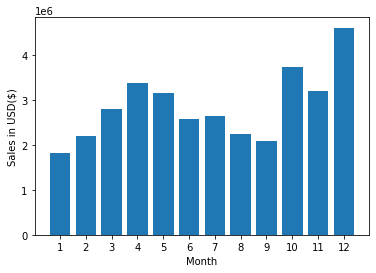

In [15]:
results = all_months_data.groupby('Month').sum()
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel("Month")
plt.show();

In [16]:
all_months_data.groupby('Month').sum().head(12)

,Quantity Ordered,Price Each,Hour,Minute,Sales
Month,,,,,
1,10903,1811768.38,139485,282440,1822256.73
2,13449,2188884.72,172669,354885,2202022.42
3,17005,2791207.83,218969,447559,2807100.38
4,20558,3367671.02,262259,544186,3390670.24
5,18667,3135125.13,238780,487899,3152606.75
6,15253,2562025.61,195528,402436,2577802.26
7,16072,2632539.56,206169,417349,2647775.76
8,13448,2230345.42,172289,353857,2244467.88
9,13109,2084992.09,168513,341698,2097560.13


December is the month with the highest sales. Potential reasons for the increase in sales include:

1) December has holiday season. A time during which most people spend much more money than they do for rest of the months.

2) The company might also provide goods at a discounted price or with other perks, resulting in this increase in sales.

3) The increment in sales could also be the result of increased advertisement expenses by the company.

## Question2: Which was the best city for sales? How much was earned from that city? #

In [17]:
all_months_data['City'] =  all_months_data['Purchase Address'].apply(lambda x: x.split(',')[1]) + "(" + all_months_data['Purchase Address'].apply(lambda x: x.split(',')[2][0:3]) + ")"
all_months_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,DateTime,Hour,Minute,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,2019-01-22 21:25:00,21,25,700.00,Boston( MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,2019-01-28 14:15:00,14,15,14.95,Portland( OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,2019-01-17 13:33:00,13,33,23.98,San Francisco( CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,2019-01-05 20:33:00,20,33,149.99,Los Angeles( CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,2019-01-25 11:59:00,11,59,11.99,Austin( TX)


In [18]:
results = all_months_data.groupby('City').sum()
results.head(100)

,Quantity Ordered,Price Each,Month,Hour,Minute,Sales
City,,,,,,
Atlanta( GA),16602,2779908.20,104794,214264,442932,2795498.58
Austin( TX),11153,1809873.61,69829,141946,289060,1819581.75
Boston( MA),22528,3637409.77,141112,288225,590442,3661642.01
Dallas( TX),16730,2752627.82,104620,214390,435155,2767975.40
Los Angeles( CA),33289,5421435.23,208325,427444,866638,5452570.80
New York City( NY),27932,4635370.83,175741,357696,733598,4664317.43
Portland( ME),2750,447189.25,17144,35211,72856,449758.27
Portland( OR),11303,1860558.22,70621,144421,295533,1870732.34
San Francisco( CA),50239,8211461.74,315520,643265,1319477,8262203.91


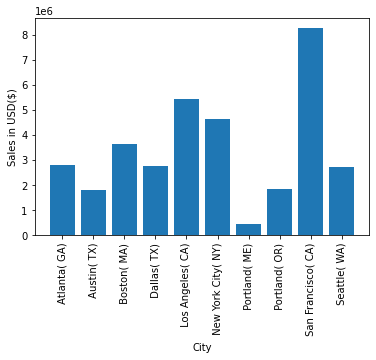

In [19]:
cities = all_months_data['City'].unique()
cities.sort()
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation="vertical")
plt.ylabel("Sales in USD($)")
plt.xlabel("City")
plt.show();

San Francisco, California has the highest number of sales during the year. This is corroborated by the fact that San Francisco has the second highest Per Capita Personal Income after New York. The reason for sales numbers in San Fransisco to be higher even than those in New York might be the fact that the items in the list are electronic items which have a much bigger market in the Silicon Valley, San Fransisco, which is full of techonlogy enthusiasts unlike than New York, where the population has hetrogenous interests and no single group dominates the market.

## Question 3: Which is the best time for ad?

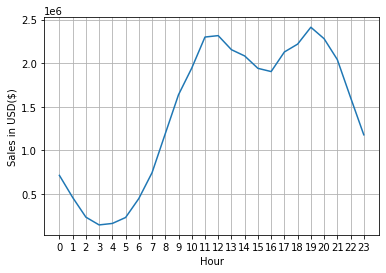

In [20]:
results = all_months_data.groupby('Hour').sum()
hours = range(0,24)

plt.plot(hours, results['Sales'])
plt.xticks(hours)
plt.ylabel("Sales in USD($)")
plt.xlabel("Hour")
plt.grid()
plt.show();

The best time slots for advertising 11am to 1pm and 6pm to 8pm. 

For the advertisements to bring in high orders during the 6pm to 8pm time slot is easily understandable, as during this slot people have free time to tune into the TV after work and major TV networks broadcast their most popular shows during this time attracting a vast audience.

The high sales resulting from advertisements during the 11am to 1pm time slot are of special interest to us as there is no obvious reason for this to be happening. During this time stay-at-home parents and non-school going children watch television but traffic is is not very high. We may be interested in further investigating this issue. Some potential reasons are:

1) The increased sales may be a result of any special TV program

2) The company is spending more money in advertising in this specific time slot.

3) There is a specific demographic which watches TV during this time and is also interested in our products.

## What products are most often sold together

In [25]:
df_temp = all_months_data[all_months_data['Order ID'].duplicated(keep=False)]
df_temp['Grouped'] = df_temp.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_temp = df_temp[df_temp['Order ID'].duplicated(keep='first')]
df_temp.head()

C:\Users\Ujjwal Raizada\AppData\Local\Temp\ipykernel_8588\982737579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Grouped'] = df_temp.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,DateTime,Hour,Minute,Sales,City,Grouped
42,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,2019-01-07 16:06:00,16,6,11.99,Austin( TX),"USB-C Charging Cable,Wired Headphones"
58,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,2019-01-02 08:25:00,8,25,11.52,Los Angeles( CA),"Apple Airpods Headphones,AA Batteries (4-pack)"
134,141365,Wired Headphones,1,11.99,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",1,2019-01-10 11:19:00,11,19,11.99,New York City( NY),"Vareebadd Phone,Wired Headphones"
154,141384,USB-C Charging Cable,1,11.95,01/03/19 00:14,"223 Jackson St, Boston, MA 02215",1,2019-01-03 00:14:00,0,14,11.95,Boston( MA),"Google Phone,USB-C Charging Cable"
221,141450,Bose SoundSport Headphones,1,99.99,01/12/19 11:16,"521 Park St, San Francisco, CA 94016",1,2019-01-12 11:16:00,11,16,99.99,San Francisco( CA),"Google Phone,Bose SoundSport Headphones"


In [26]:
count = Counter()
for row in df_temp['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common()
    

[(('iPhone', 'Lightning Charging Cable'), 1135),
 (('Google Phone', 'USB-C Charging Cable'), 1129),
 (('iPhone', 'Wired Headphones'), 540),
 (('Google Phone', 'Wired Headphones'), 535),
 (('iPhone', 'Apple Airpods Headphones'), 439),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 412),
 (('USB-C Charging Cable', 'Wired Headphones'), 292),
 (('Google Phone', 'Bose SoundSport Headphones'), 283),
 (('Vareebadd Phone', 'Wired Headphones'), 184),
 (('Lightning Charging Cable', 'Wired Headphones'), 161),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 134),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 133),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 102),
 (('Apple Airpods Headphones', 'Wired Headphones'), 101),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 87),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 62),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 59),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 57),
 (

'iPhone' & 'Lightning Charging Cable' is the pair sold most often together closely followed by 'Google Phone' & 'USB-C Charging Cable'.

## What product sold the most?

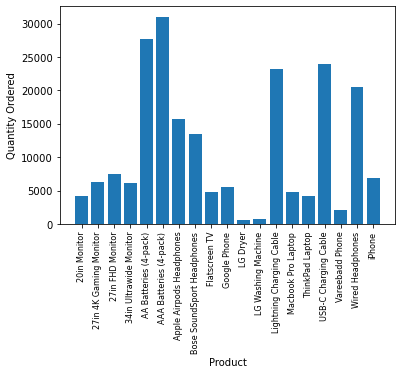

In [30]:
product_group = all_months_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df_temp in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show();

The most sold product is AAA Batteries (4-pack) followed AA Batteries (4-pack) and USB-C Charging Cable.

C:\Users\Ujjwal Raizada\AppData\Local\Temp\ipykernel_8588\1935991618.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


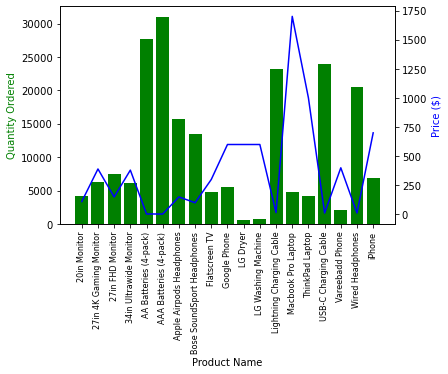

In [32]:
prices = all_months_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show();

By plotting the price line along with the quantity of product sold, we can clearly see that there is a inverse relation between the price  of a commodity and its quantity sold. Consumer Durables like Dryer, Washing Machines, TV and Monitors which are bought once every few years  and are comparatively expensive have the lowest sales. On the other hand, items like batteries, cables, headphones which cost less and are changed often have very high sales. The only exception to this is Macbook Pro, which despite being the most expensive item on the list sells more pieces than even the goods which are sold at half its price. This could be attributed to the brand name of "Apple", which results in high sales despite its very high price.